In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [3]:
data = pd.read_csv('../00_source_data/synthetic_data_yelp.csv', encoding='latin-1')

In [4]:
data.dropna(inplace=True)
data.head()

,label,text
0,1,omgk place smoothi coffe third floor th outsid...
1,1,food averag stuck one back nnmi boyfriend girl...
2,1,first time got half price total bs car wash mi...
3,1,place close hous insult stingi light cant imag...
4,1,everyth els way worth term real authentix shaw...


In [5]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2,random_state=42)

In [6]:
# CounterVectizor
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [7]:
# training classifier with NB
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [8]:
# print prediction and metrics on training set
y_pred_tr = nb.predict(X_train_cv)
print('Training set')
print('Accuracy: ', accuracy_score(y_train, y_pred_tr))
print('Confusion Matrix: ')
print(confusion_matrix(y_train, y_pred_tr))
print('Classification Report: ')
print(classification_report(y_train, y_pred_tr))
print('=====================================')

# print prediction and metrics on test set
y_pred_te = nb.predict(X_test_cv)
print('Test set')
print('Accuracy: ')
print(accuracy_score(y_test, y_pred_te))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_te))
print('Classification Report: ')
print(classification_report(y_test, y_pred_te))

Training set
Accuracy:  0.946625
Confusion Matrix: 
[[3830  158]
 [ 269 3743]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.93      0.96      0.95      3988
           2       0.96      0.93      0.95      4012

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000

Test set
Accuracy: 
0.9085
Confusion Matrix: 
[[949  63]
 [120 868]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.89      0.94      0.91      1012
           2       0.93      0.88      0.90       988

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



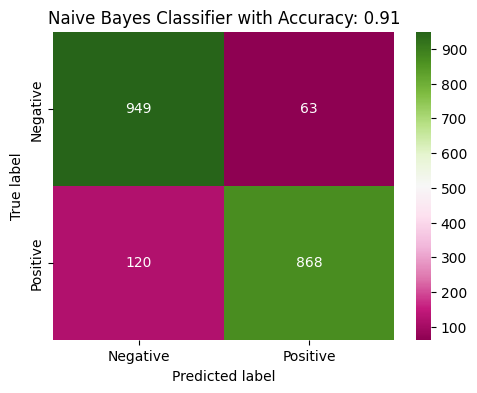

In [9]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_te)
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap="PiYG")
plt.title('Naive Bayes Classifier with Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred_te)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# save plot to file
plt.savefig('../30_results/NB_synthetic_data.png')